In [76]:
import matplotlib.pyplot as plt
import re

In [77]:
# Adaptive Modulated Features for M
# AMFM
method = "AMFML (Ours)"

In [78]:
def get_val_macc(file_path):
    accs = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
            obj = re.search("tensor\(([\d\.]+)\)", str(line))
            if obj is not None:
                accs.append(float(obj.group(1)))
    return accs

In [79]:
dataroot = "Facial_Attributes_MTL_Basiline/"
models = ["resnet18", "alexnet", "lenet", "convnet"]
model_strs = ["ResNet18", "AlexNet", "LeNet", "ConvNet"]
model_size = [218, 44, 21, 4.5]
model_size = [str(x)+f"\n{model_strs[i]}" for i, x in enumerate(model_size)]

In [80]:
accs = get_val_macc(dataroot+"9tasks_alexnet_cosine.txt")

In [81]:
base_accs = []
our_accs = []
for i, model in enumerate(models):
    base_path = dataroot + f"9tasks_{model}_cosine.txt"
    our_path = dataroot + f"9tasks_{model}_cosine_afrm.txt"
    cur_base_accs = get_val_macc(base_path)
    cur_our_accs = get_val_macc(our_path)
    base_accs.append(max(cur_base_accs) * 100)
    our_accs.append(max(cur_our_accs) * 100)

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
def get_display_text(num):
    if num > 0:
        return f"+{num}"
    else:
        return str(num)

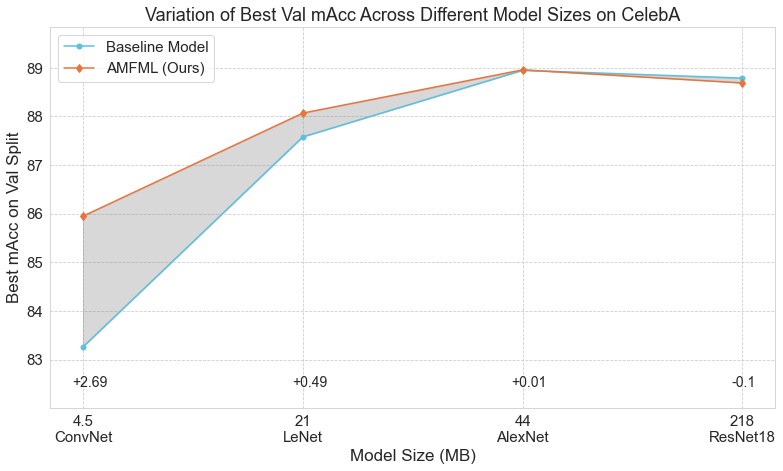

In [177]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (13, 7))
x2 = np.arange(len(base_accs))
plt.xticks(x2, model_size)
plt.plot(x2, base_accs, marker=".", color="#5bc0de", markersize = 10, label="Baseline Model")
plt.plot(x2, our_accs, marker="d", color="#E8743B", markersize = 6, label=method)
plt.fill_between(x2, base_accs, our_accs, color="grey", alpha=0.3)
ymin = min(base_accs)
ymax = max(base_accs)
plt.ylim([ymin*0.985, ymax*1.01])
# fig = plt.figure(figsize=(16,10), dpi=300)
for ii in range(len(our_accs)):
    plt.text(x2[ii]+0.05, ymin*0.99, get_display_text(round(our_accs[ii]-base_accs[ii], 3)), size=14)
plt.legend(fontsize=15)
plt.gca().invert_xaxis()
plt.xlabel("Model Size (MB)", fontsize=17)
plt.ylabel("Best mAcc on Val Split", fontsize=17)
plt.title(f"Variation of Best Val mAcc Across Different Model Sizes on CelebA", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("celeba.png", bbox_inches='tight')

In [162]:
def get_loss(file_path):
    losses = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
#             obj = re.search("Epoch\s+\[\d+\],\s+Iter\s+\[\d+/\d+\]\s+Loss:\s+([\d\.]+)", str(line))
#             obj = re.search("Loss:\s+([\d\.]+)", str(line))
            obj = re.search("average_loss:\s+([\d\.]+)", str(line))
            if obj is not None:
                losses.append(float(obj.group(1)))
    return losses

def get_test_loss(file_path):
    losses = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
#             obj = re.search("Epoch\s+\[\d+\],\s+Iter\s+\[\d+/\d+\]\s+Loss:\s+([\d\.]+)", str(line))
#             obj = re.search("Loss:\s+([\d\.]+)", str(line))
            obj = re.search("TEST LOSS on \d+th epoch:\s+([\d\.]+)", str(line))
            if obj is not None:
                losses.append(float(obj.group(1)))
    return losses

In [139]:
dataroot = "NYU-V2/logs/"

In [140]:
losses = get_loss(dataroot+"nyu_seg_sn.txt")
print(len(losses))

2000


In [141]:
filenames = {"nyu_seg_sn.txt": "Baseline", "nyu_seg_sn_afrm.txt": f"{method}, Lambda=0", \
            "nyu_seg_sn_afrm_1e_m2.txt": f"{method}, Lambda=1e-2", "nyu_seg_sn_afrm_1e_m3.txt": f"{method}, Lambda=1e-3",\
            "nyu_seg_sn_afrm_1e_m4.txt": f"{method}, Lambda=1e-4"}

In [145]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

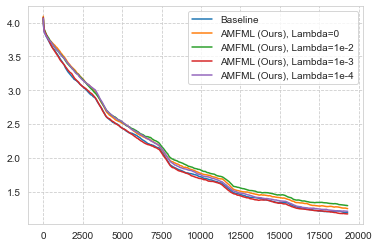

In [160]:
for filename, label in filenames.items():
    loss = moving_average(get_loss(dataroot+filename), 70)
    xticks = np.arange(len(loss)) * 10
    plt.plot(xticks, loss, label=label)
plt.legend()